# Plotting for Exploratory data analysis (EDA) for haberman data

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


haberman = pd.read_csv("haberman.csv")



In [16]:
# data-points and features (rows and columns)
print (haberman.shape)

(306, 4)


In [17]:
# column names in dataset
print (haberman.columns)
# rename columns
haberman.columns=['age','year_operated','ax_nodes','survive_status']

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [18]:

haberman["survive_status"].value_counts()
#haberman.info()

#refered stackoverflow for changing values with map
haberman['survive_status'] = haberman['survive_status'].map({1:True, 2:False})


haberman.head(5)


,age,year_operated,ax_nodes,survive_status
0,30,64,1,True
1,30,62,3,True
2,30,65,0,True
3,31,59,2,True
4,31,65,4,True


#In Status, 1 represents survival for 5 or more than 5 years whereas 2 represents survival within 5 years. 

# (3.2) 2-D Scatter Plot

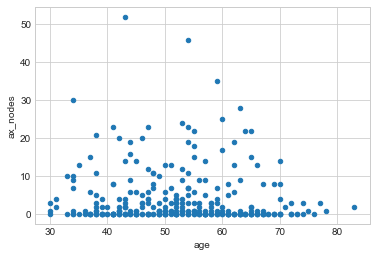

In [19]:
#2-D scatter plot:


haberman.plot(kind='scatter', x='age', y='ax_nodes') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier status(survival).

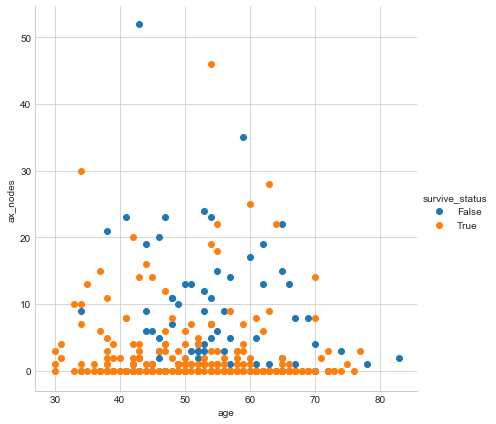

In [26]:

# Here 'sns' corresponds to seaborn.


sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survive_status", size=6) \
   .map(plt.scatter, "age", "ax_nodes") \
   .add_legend();
plt.show();




**Observation(s):**
1. It is clear that when axillary nodes are zero the chance of surviving also increases regardless of age

## 3D Scatter plot

#  (3.3) Pair-plot

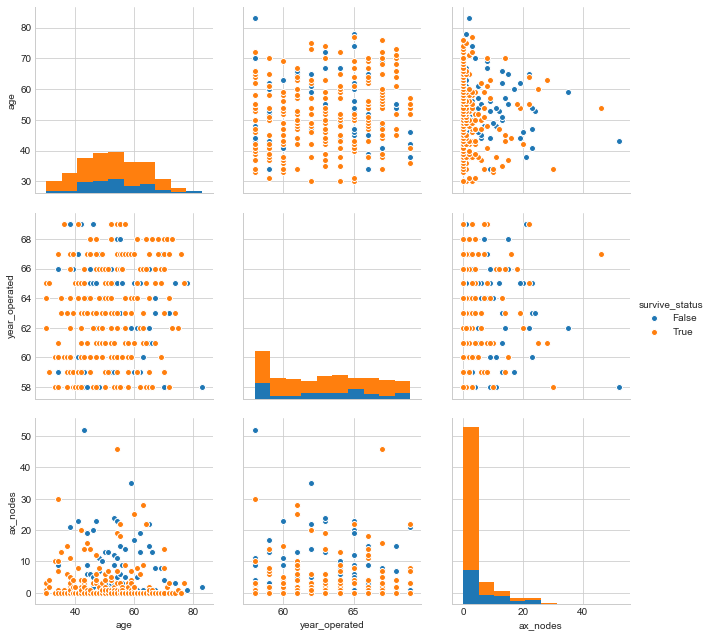

In [76]:

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survive_status",vars=['age','year_operated','ax_nodes'], size=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature.

**Observations**
1. axially nodes and age are the most useful features to identify survival circumstances.
2. Lesser the axillary nodes higher is chance of survival and also the age group below 40 have some more chance of survival than greater than 40 age group
3.Using some simple if else we can predict the survival chance

# (3.4) Histogram, PDF, CDF

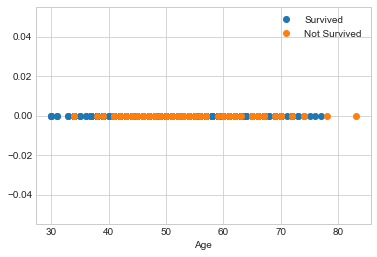

In [77]:

#1-D scatter plot of age
import numpy as np
survived_haberman = haberman.loc[haberman["survive_status"] == True];
not_survived_haberman = haberman.loc[haberman["survive_status"] == False];
plt.plot(survived_haberman["age"], np.zeros_like(survived_haberman['age']),'o',label='Survived')
plt.plot(not_survived_haberman["age"], np.zeros_like(not_survived_haberman['age']), 'o',label='Not Survived')
plt.xlabel('Age')
plt.legend()
plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.

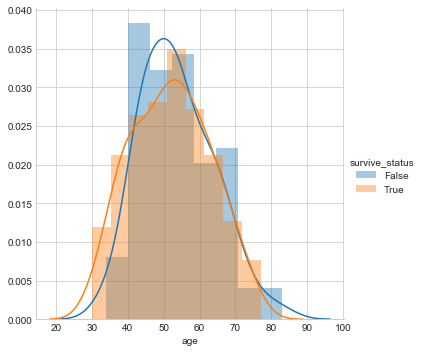

In [78]:
sns.FacetGrid(haberman, hue="survive_status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();



# observation
 1. It seems from the figure ,the Age group below 40 have some probability of survival more than dying.

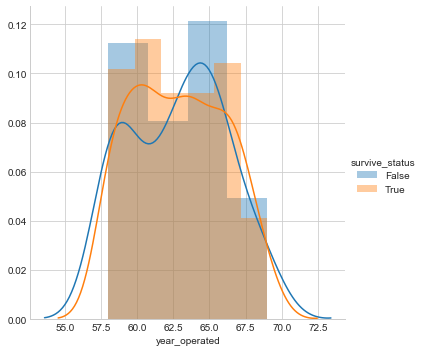

In [79]:
sns.FacetGrid(haberman, hue="survive_status", size=5) \
   .map(sns.distplot, "year_operated") \
   .add_legend();
plt.show();

# observation
1. It seems year of operation is not a useful feature as it shows nothing

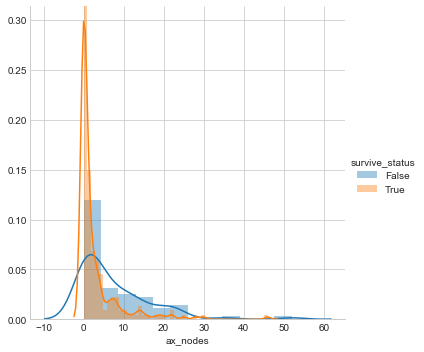

In [80]:
sns.FacetGrid(haberman, hue="survive_status", size=5) \
   .map(sns.distplot, "ax_nodes") \
   .add_legend();
plt.show();

**Observation**

1.It is clearly observed that the age group below 40 have some chance of survival higher than 40 and above age group peoples.

2.It is clearly also visible that when axillary nodes are less ,the chance of survival is high and vice-versa.


[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]


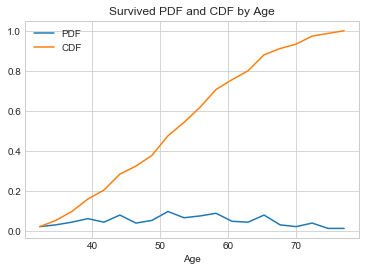

In [81]:


counts, bin_edges = np.histogram(survived_haberman['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF');
plt.plot(bin_edges[1:], cdf,label='CDF')

plt.legend()
plt.xlabel('Age')
plt.title('Survived PDF and CDF by Age')

plt.show();


[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[34.   36.45 38.9  41.35 43.8  46.25 48.7  51.15 53.6  56.05 58.5  60.95
 63.4  65.85 68.3  70.75 73.2  75.65 78.1  80.55 83.  ]


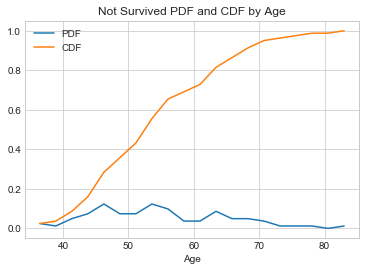

In [82]:


counts, bin_edges = np.histogram(not_survived_haberman['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='PDF')
plt.plot(bin_edges[1:], cdf,label='CDF')
plt.xlabel('Age')
plt.legend()
plt.title('Not Survived PDF and CDF by Age')



plt.show();

[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[30.   32.35 34.7  37.05 39.4  41.75 44.1  46.45 48.8  51.15 53.5  55.85
 58.2  60.55 62.9  65.25 67.6  69.95 72.3  74.65 77.  ]
[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[34.   36.45 38.9  41.35 43.8  46.25 48.7  51.15 53.6  56.05 58.5  60.95
 63.4  65.85 68.3  70.75 73.2  75.65 78.1  80.55 83.  ]


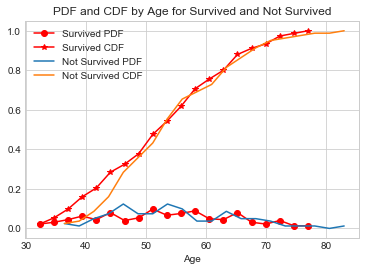

In [83]:
# Plots of CDF of age for survived and not survived status.

counts, bin_edges = np.histogram(survived_haberman['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'ro-',label='Survived PDF')
plt.plot(bin_edges[1:], cdf,'r*-',label='Survived CDF')

# Not survived
counts, bin_edges = np.histogram(not_survived_haberman['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Not Survived PDF')
plt.plot(bin_edges[1:], cdf,label='Not Survived CDF')
plt.xlabel('Age')
plt.title("PDF and CDF by Age for Survived and Not Survived")
plt.legend()

plt.show();

# observation
1. Both survived and not survived PDF and CDF's are moreover similar and overlaps too much ,we can't get any useful observations.

# (3.5) Mean, Variance and Std-dev

In [84]:
#Mean, Variance, Std-deviation,  
print("AGE FEATURE")
print("Means:")
print(np.mean(survived_haberman["age"]))
#Mean with an outlier.
#print(np.mean(np.append(survived_haberman["age"],500)));
print(np.mean(not_survived_haberman["age"]))

print("\nStd-dev:");
print(np.std(survived_haberman["age"]))
print(np.std(not_survived_haberman["age"]))
print("\nYEAR OF OPERATION")
year_df=pd.DataFrame(data={'Survived':survived_haberman['year_operated'].describe(),'Not Survived':not_survived_haberman['year_operated'].describe()})
print(year_df)
print("\nAUXILLARY NODES")
ax_df=pd.DataFrame(data={'Survived':survived_haberman['ax_nodes'].describe(),'Not Survived':not_survived_haberman['ax_nodes'].describe()})
print(ax_df)



AGE FEATURE
Means:
52.01777777777778
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131

YEAR OF OPERATION
         Survived  Not Survived
count  225.000000     81.000000
mean    62.862222     62.827160
std      3.222915      3.342118
min     58.000000     58.000000
25%     60.000000     59.000000
50%     63.000000     63.000000
75%     66.000000     65.000000
max     69.000000     69.000000

AUXILLARY NODES
         Survived  Not Survived
count  225.000000     81.000000
mean     2.791111      7.456790
std      5.870318      9.185654
min      0.000000      0.000000
25%      0.000000      1.000000
50%      0.000000      4.000000
75%      3.000000     11.000000
max     46.000000     52.000000


# Observation
1. it is evident that the data are similar for the features age and year of operation
2. For axillary nodes , that Survived people have less data in all the fields(mean,std,...) than that of the Not survived people 

# (3.6) Median, Percentile, Quantile, IQR, MAD

In [85]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(survived_haberman["age"]))
#Median with an outlier
print(np.median(np.append(survived_haberman["age"],50)));
print(np.median(not_survived_haberman["age"]))


print("\nQuantiles:")
print(np.percentile(survived_haberman["age"],np.arange(0, 100, 25)))
print(np.percentile(not_survived_haberman["age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(survived_haberman["age"],90))
print(np.percentile(not_survived_haberman["age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(survived_haberman["age"]))
print(robust.mad(not_survived_haberman["age"]))



Medians:
52.0
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


# (3.7) Box plot and Whiskers

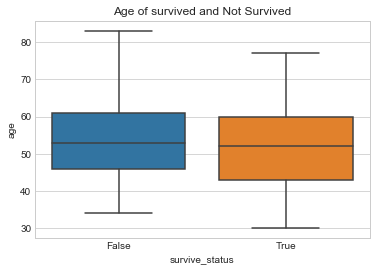

In [86]:

sns.boxplot(x='survive_status',y='age', data=haberman)
plt.title("Age of survived and Not Survived")
plt.show()
#observation
#1. Nothing can be observed as both survived and not survived people's age box plots are at same level. 

# observation
1. Nothing can be observed as both survived and not survived people's age box plots are at same level. 

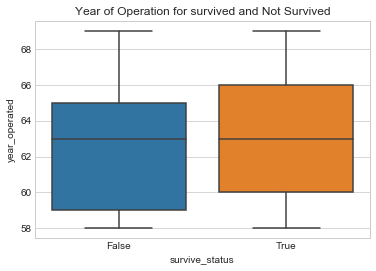

In [87]:
sns.boxplot(x='survive_status',y='year_operated', data=haberman)
plt.title("Year of Operation for survived and Not Survived")
plt.show()
#observation
#1. Nothing can be observed as both survived and not survived people's box plots are at same level. 

# observation
1. Nothing can be observed as both survived and not survived people's box plots are at same level. 

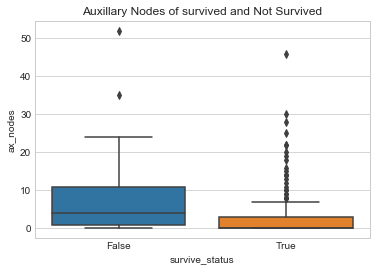

In [88]:
sns.boxplot(x='survive_status',y='ax_nodes', data=haberman)
plt.title("Auxillary Nodes of survived and Not Survived")
plt.show()
#observation
#1. Both Survived(75%) and not survived people(50%) have auxillary nodes less than 4(approximately)   

# observation
1. Both Survived(75%) and not survived people(50%) have auxillary nodes less than 4(approximately)   

# (3.8) Violin plots

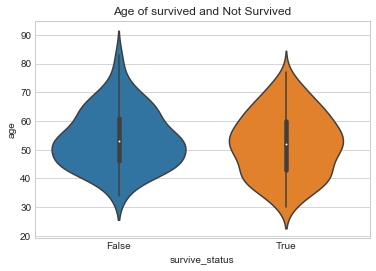

In [100]:

sns.violinplot(x="survive_status", y="age", data=haberman, size=8)
plt.title("Age of survived and Not Survived")
plt.show()
#observation
#1. Nothing can be observed as both survived and not survived people's age violin plots are at same level. 


# observation
1. Nothing can be observed as both survived and not survived people's age violin plots are at same level.

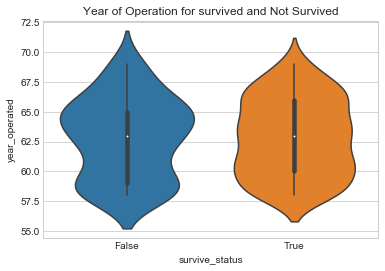

In [90]:
sns.violinplot(x="survive_status", y="year_operated", data=haberman, size=8)
plt.title("Year of Operation for survived and Not Survived")
plt.show()
#observation
#1. Nothing can be observed as both survived and not survived people's violin plots are at same level. 

# observation
1. Nothing can be observed as both survived and not survived people's violin plots are at same level. 

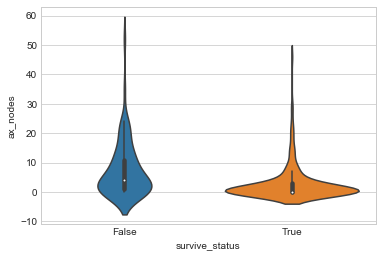

In [91]:
sns.violinplot(x="survive_status", y="ax_nodes", data=haberman, size=8)
plt.show()

# observation
1. From above violin plots axillary nodes give information that surviving status is high when there is less axillary nodes operated and other plots dont show much information.


# (3.11) Multivariate probability density, contour plot.


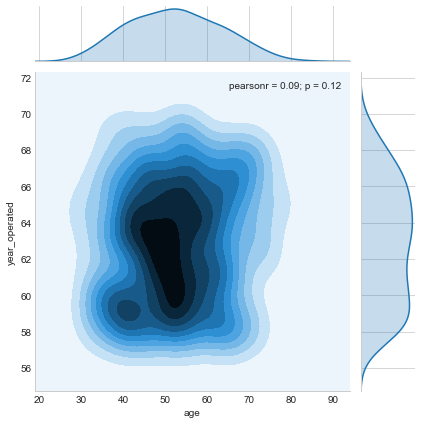

In [92]:
#2D Density plot, contors-plot
sns.jointplot(x="age", y="year_operated", data=haberman, kind="kde");
plt.show();

#observation 
# 1. the peak  is similar to other areas and Can't determine anything


# observation 
1. the peak  is similar to other areas and Can't determine anything

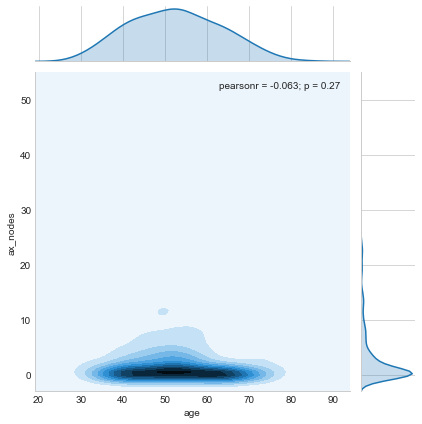

In [93]:
sns.jointplot(x="age", y="ax_nodes", data=haberman, kind="kde");
plt.show();
#observation 
# 1. the peak when seen from axillary nodes axis it can be determined that maximum survival is only when the axillary node is almost zero
# 1. the peak  is similar to other areas from the age axis  and Can't determine anything


# observation 
 1. the peak when seen from axillary nodes axis it can be determined that maximum survival is only when the axillary node is almost zero
 2. the peak  is similar to other areas from the age axis  and Can't determine anything

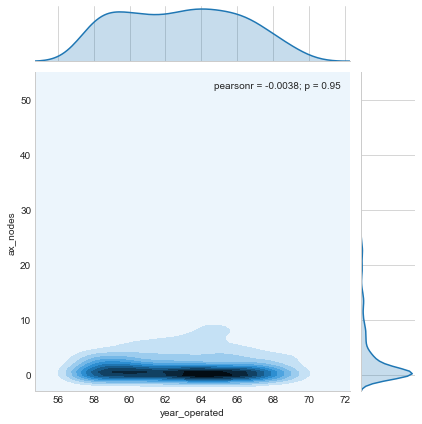

In [94]:
sns.jointplot(x="year_operated", y="ax_nodes", data=haberman, kind="kde");
plt.show();

# observation
1. It can be determined that the feature auxillary nodes is the valuable feature than all others .
2. The peak area is wide spread in all other features (age and Year operated) and hence couldn't determine anything.
3. Auxillary Nodes shows that survival is almost maximum when the number of nodes remains almost zero.

In [95]:
survived_haberman_SW = survived_haberman.iloc[:,1]
not_survived_haberman_SW = not_survived_haberman.iloc[:,1]



In [96]:
from scipy import stats
stats.ks_2samp(survived_haberman_SW, not_survived_haberman_SW)
#we cannot reject the null hypothesis since the p value difference is not so big

Ks_2sampResult(statistic=0.07259259259259257, pvalue=0.9013727258134205)

In [97]:
x = stats.norm.rvs(loc=0.2, size=10)
stats.kstest(x,'norm')


KstestResult(statistic=0.23889758686856116, pvalue=0.5508298047259159)

In [98]:
x = stats.norm.rvs(loc=0.2, size=100)
stats.kstest(x,'norm')


KstestResult(statistic=0.15823847225085794, pvalue=0.011820792037935401)

In [99]:
x = stats.norm.rvs(loc=0.2, size=1000)
stats.kstest(x,'norm')


KstestResult(statistic=0.07768163334823797, pvalue=1.0744122334704898e-05)

# (3.12) Final Observation:

1. From the dataset it is clear that the people below the age of 40 have some more survival chances above 5 years than other age peoples
2. It is also evident that axillary nodes is much useful than anyother fields and chance of survival above 5 years increases when axillary nodes are less and vice versa.